In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Random Forests feature selection

* Jeśli spojrzysz na jedno Drzewo decyzyjne, ważne współrzędne prawdopodobnie pojawią się bliżej korzenia drzewa (root), podczas gdy nieistotne współrzędne będą często wyświetlane bliżej liści (lub wcale). 

* W związku z tym można oszacować znaczenie danej współrzednej, obliczając średnią głębokość na jakiej pojawia się ona na wszystkich drzewach w lesie.

* Scikit-Learn oblicza to automatycznie dla każdej funkcji po treningu. 

* Możesz uzyskać dostęp do wyniku za pomocą zmiennej feature\_importances\_. 



# MNIST

In [9]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X/255.
y = np.asarray(y, dtype=np.int32)

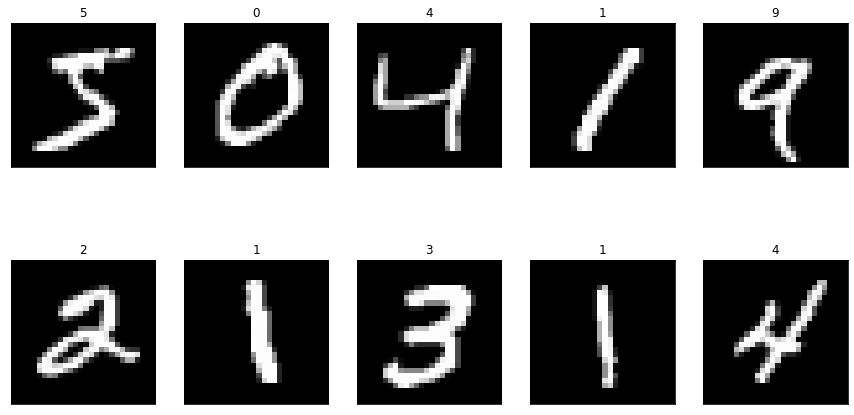

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y, X, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

In [11]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [12]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.hot, #.gist_gray,
               interpolation="nearest")
    plt.axis("off")


In [13]:
# rnd_clf.feature_importances_

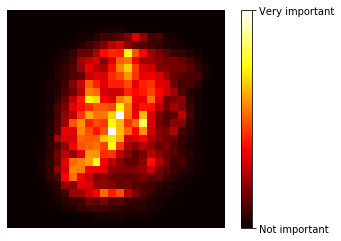

In [14]:
plot_digit(rnd_clf.feature_importances_)#.reshape(28,28)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()